## Import Necessary LIbraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load and review Data

In [4]:
mpgdata = pd.read_csv("auto-mpg.csv")
mpgdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Exploratory Data Analysis

In [6]:
mpgdata.shape

(398, 9)

In [7]:
mpgdata['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [4]:
mpgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
mpgdata.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [9]:
mpgdata = mpgdata.drop('car name',axis = 1)
mpgdata['origin'] = mpgdata['origin'].replace({1 :' America',2 : 'Europe', 3 : 'Asia'})

In [13]:
mpgdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [14]:
mpgdata = pd.get_dummies(mpgdata, columns = ['origin'])

In [17]:
mpgdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_ America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [18]:
mpgdata.dtypes


mpg                float64
cylinders            int64
displacement       float64
horsepower          object
weight               int64
acceleration       float64
model year           int64
origin_ America      uint8
origin_Asia          uint8
origin_Europe        uint8
dtype: object

In [19]:
mpgdata = mpgdata.drop('model year',axis = 1)

In [24]:
hpisdigit = pd.DataFrame(mpgdata.horsepower.str.isdigit())

mpgdata[hpisdigit['horsepower'] == False]


,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_ America,origin_Asia,origin_Europe
32,25.0,4,98.0,?,2046,19.0,1,0,0
126,21.0,6,200.0,?,2875,17.0,1,0,0
330,40.9,4,85.0,?,1835,17.3,0,0,1
336,23.6,4,140.0,?,2905,14.3,1,0,0
354,34.5,4,100.0,?,2320,15.8,0,0,1
374,23.0,4,151.0,?,3035,20.5,1,0,0


In [25]:
mpgdata.dtypes

mpg                float64
cylinders            int64
displacement       float64
horsepower          object
weight               int64
acceleration       float64
origin_ America      uint8
origin_Asia          uint8
origin_Europe        uint8
dtype: object

In [26]:
mpgdata = mpgdata.replace('?',np.nan)
mpgdata[hpisdigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_ America,origin_Asia,origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,1,0,0


In [28]:
mpgdata['horsepower'].median()

93.5

In [29]:
medianfill = lambda m:m.fillna(m.median())
mpgdata = mpgdata.apply(medianfill,axis = 0)

mpgdata['horsepower'] = mpgdata['horsepower'].astype('float64')

In [30]:
mpgdata.dtypes

mpg                float64
cylinders            int64
displacement       float64
horsepower         float64
weight               int64
acceleration       float64
origin_ America      uint8
origin_Asia          uint8
origin_Europe        uint8
dtype: object

In [32]:
mpgdata.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin_ America', 'origin_Asia', 'origin_Europe'],
      dtype='object')

## Bi-Variate Plots

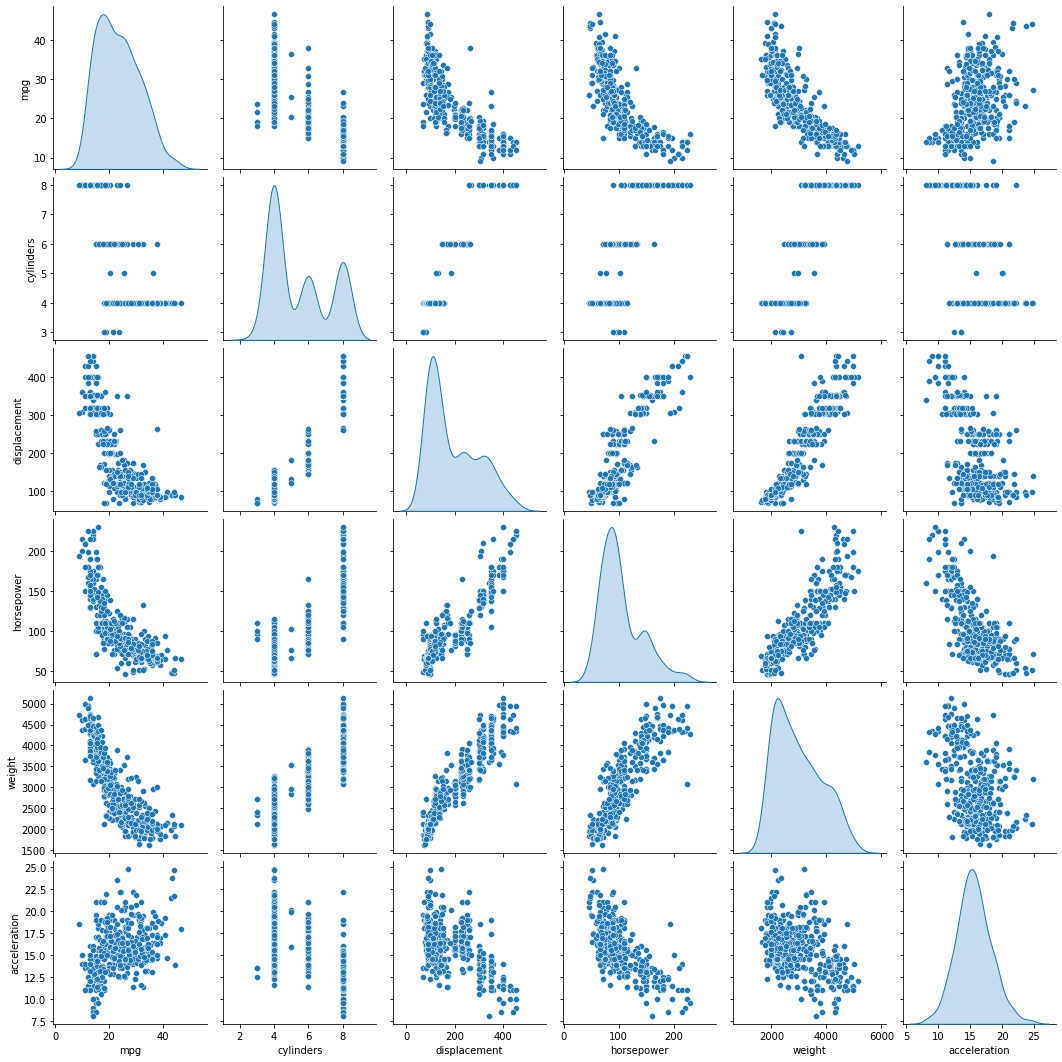

In [33]:
sns.pairplot(mpgdata[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration']],diag_kind = 'kde')

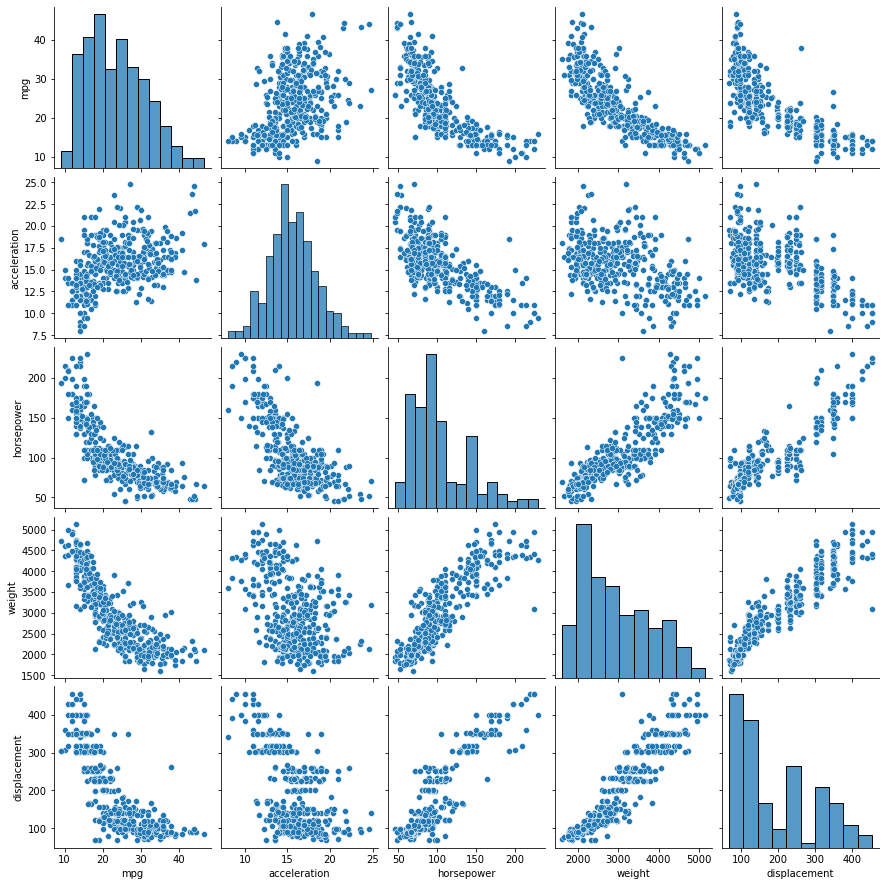

In [90]:
sns.pairplot(mpgdata[['mpg','acceleration','horsepower','weight','displacement']])

## Split Data

In [36]:
X = mpgdata.drop(['mpg','origin_Europe'], axis = 1)

y = mpgdata[['mpg']]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [38]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin_ America', 'origin_Asia'],
      dtype='object')

In [42]:
y_test.shape

(120, 1)

In [40]:
print(f"Training set : {X_train.shape} and Test set : {X_test.shape}")

Training set : (278, 7) and Test set : (120, 7)


## Fit Linear Model

In [43]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [44]:
for idx,col_name in enumerate(X_train.columns) :
    print(f"Coefficent for {col_name} is {regression_model.coef_[0][idx]}")

Coefficent for cylinders is -0.5385175619522525
Coefficent for displacement is 0.009552745274875875
Coefficent for horsepower is -0.05727699079305892
Coefficent for weight is -0.005060766643316693
Coefficent for acceleration is -0.04984260331460866
Coefficent for origin_ America is -0.988421772172565
Coefficent for origin_Asia is 1.2409067902062085


In [54]:
mpgdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_ America,origin_Asia,origin_Europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [45]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 46.682021978212504


In [49]:
y_pred = regression_model.predict(X_test)
print(regression_model.score(X_train,y_train))

0.6946279278265037


In [50]:
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse 
print("-------Linear Regression - Model Evaluation -----")
print(f"Mean Absolute Error (MAE) : {mae(y_test,y_pred)}")
print(f"Mean Square Error (MSE) : {mse(y_test,y_pred)}")
print(f"Root Mean Square Error (RMSE) : {np.sqrt(mse(y_test,y_pred))}")

-------Linear Regression - Model Evaluation -----
Mean Absolute Error (MAE) : 2.828661008780393
Mean Square Error (MSE) : 13.300549770221965
Root Mean Square Error (RMSE) : 3.6469918796484815


In [51]:
regression_model.score(X_test,y_test)

0.7725116212499805

In [72]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train3)
X_test2 = poly.fit_transform(X_test3)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred_poly = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9008030438132281


In [91]:
print(X_train2.shape)

(278, 37)


In [73]:
print(poly_clf.score(X_test2, y_test))

-2.1192836105629816e+22


In [61]:
print("-------Linear Regression - Model Evaluation -----")
print(f"Mean Absolute Error (MAE) : {mae(y_test,y_pred_poly)}")
print(f"Mean Square Error (MSE) : {mse(y_test,y_pred_poly)}")
print(f"Root Mean Square Error (RMSE) : {np.sqrt(mse(y_test,y_pred_poly))}")

-------Linear Regression - Model Evaluation -----
Mean Absolute Error (MAE) : 2.2047658774505057
Mean Square Error (MSE) : 7.907998456582832
Root Mean Square Error (RMSE) : 2.812116366116956


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train)
X_test3 = scaler.fit_transform(X_test)
print(X_train.shape)

(278, 8)


In [63]:
regression_model.fit(X_train3,y_train)
regression_model.score(X_train3,y_train)

0.8141025501610559

In [67]:
regression_model.score(X_test3, y_test)

0.8447796130632899

In [68]:
y_pred3 = poly_clf.predict(X_test3)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 37 is different from 8)

In [66]:
print("-------Linear Regression - Model Evaluation -----")
print(f"Mean Absolute Error (MAE) : {mae(y_test,y_pred3)}")
print(f"Mean Square Error (MSE) : {mse(y_test,y_pred3)}")
print(f"Root Mean Square Error (RMSE) : {np.sqrt(mse(y_test,y_pred3))}")

-------Linear Regression - Model Evaluation -----


NameError: name 'y_pred3' is not defined

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train2)
X_test4 = scaler.fit_transform(X_test2)
print(X_train4.shape)

(278, 37)


In [70]:
regression_model.fit(X_train4,y_train)
regression_model.score(X_train4,y_train)

0.8918582083208004

In [71]:
regression_model.score(X_test4,y_test)

0.8228177281061163